# HABERMAN'S SURVIVAL DATASET

Description:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.


About this file

Title:   Haberman's Survival Data

Sources: https://www.kaggle.com/gilsousa/habermans-survival-data-set



Number of Instances: 306

Number of Attributes: 4 (including the class attribute)

Attribute Information: 1.Age of patient at time of operation (numerical)
                       2.Patient's year of operation (year - 1900, numerical)
                       3.Number of positive axillary nodes detected (numerical)
                       4.Survival status (class attribute) 1 = the patient survived 5 years or longer,2 = the patient died                              within 5 year

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
haberman = pd.read_csv("haberman.csv")

In [3]:
haberman.shape

(306, 4)

In [4]:
haberman.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [5]:
haberman.status.value_counts()

1    225
2     81
Name: status, dtype: int64

Observations:
1. The Haberman dataset contains 306 rows and 4 columns
2. The data is taken for 306 women,among which 225 women survived for more than 5 years and 81 survived less than 5 years
3. This means that there are only two classes,one whose survival period is more than 5 years and other less than 5 years denoted by 1 & 2 respectively.
4. This is imbalance data set.

# 2-D Scatter Plot

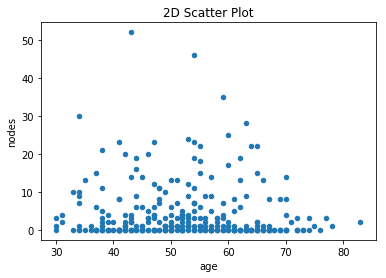

In [6]:
haberman.plot(kind='scatter', x='age', y='nodes') ;
plt.title("2D Scatter Plot")
plt.show()

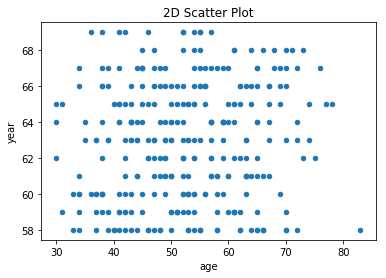

In [7]:
haberman.plot(kind='scatter', x='age', y='year') ;
plt.title("2D Scatter Plot")
plt.show()

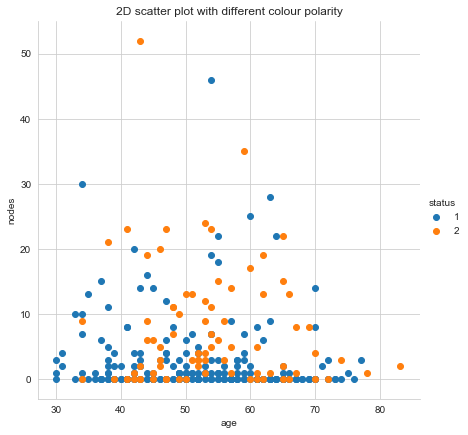

In [8]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height=6) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.title("2D scatter plot with different colour polarity")
plt.show();

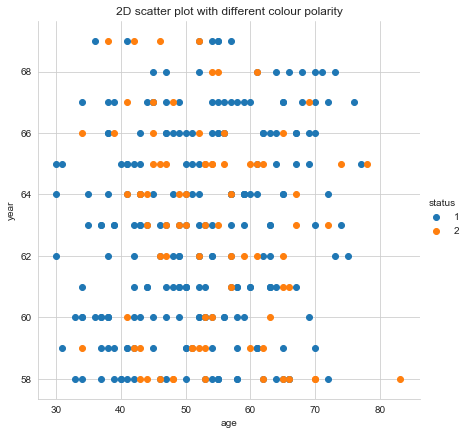

In [9]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height=6) \
   .map(plt.scatter, "age", "year") \
   .add_legend();
plt.title("2D scatter plot with different colour polarity")
plt.show();

Obsevations:
1. It is not possible to distingish the patients who survived less than and more than 5 years since both types of data points are overlaping

C:\Users\FAISAL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


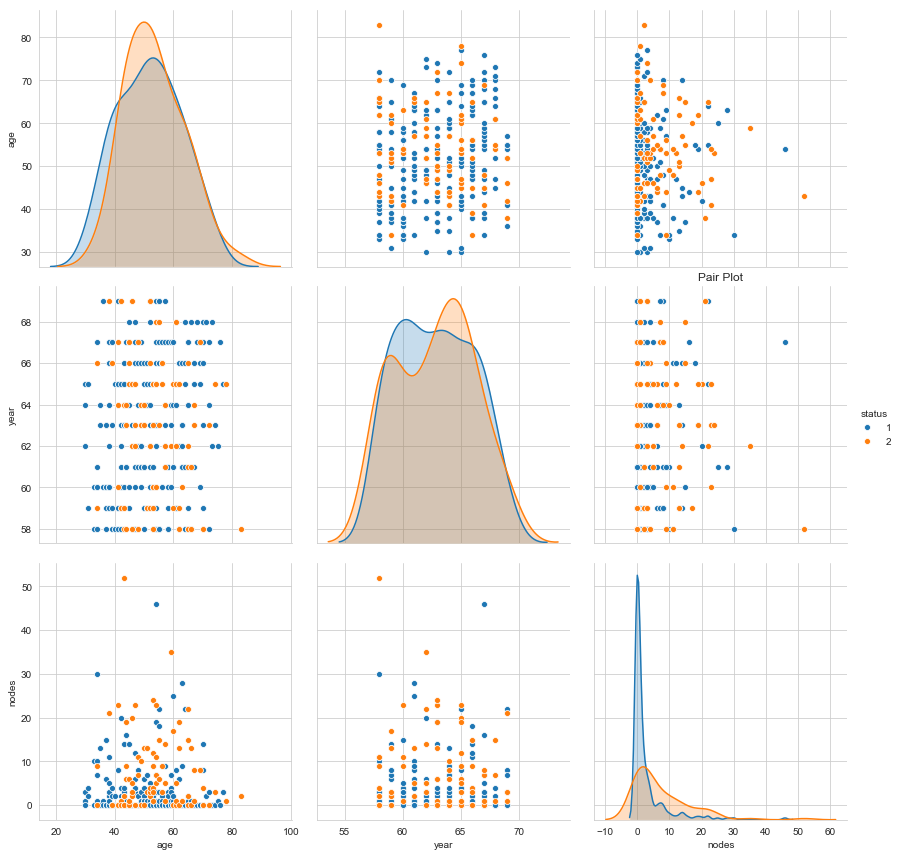

In [10]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status",vars=["age", "year", "nodes"], height=4);
plt.title("Pair Plot")
plt.show()

Observations:

1. As we are unable to classify which is the most useful feature because of too much overlapping. But, Somehow we can say, In      operation_year, 60-65 more person died who has less than 6 axillary_lymph_node.
2. The given dataset is not linearly seprable form each class.
3. And hence, this plot is not much informative in this case.

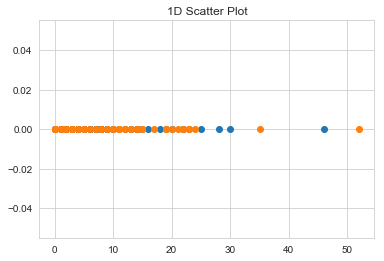

In [11]:
import numpy as np
haberman_1 = haberman.loc[haberman["status"] == 1];
haberman_2 = haberman.loc[haberman["status"] == 2];

plt.plot(haberman_1["nodes"], np.zeros_like(haberman_1['nodes']), 'o')
plt.plot(haberman_2["nodes"], np.zeros_like(haberman_2['nodes']), 'o')

plt.title("1D Scatter Plot")
plt.show()

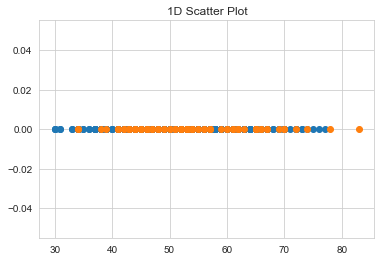

In [12]:
import numpy as np
haberman_1 = haberman.loc[haberman["status"] == 1];
haberman_2 = haberman.loc[haberman["status"] == 2];

plt.plot(haberman_1["age"], np.zeros_like(haberman_1['age']), 'o')
plt.plot(haberman_2["age"], np.zeros_like(haberman_2['age']), 'o')

plt.title("1D Scatter Plot")
plt.show()

Observations:

1. After looking at this plot we can easily count number of points that are there in age range and node range who survived or not.
2. Many person died whose age was between 41-70.
3. Many person died whose auxilliary lymph node was between 0-24

# HISTOGRAM(PDF)

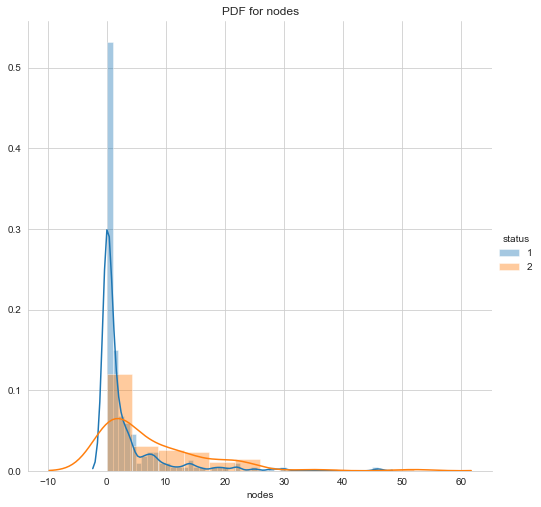

In [14]:
sns.FacetGrid(haberman, hue="status", height=7) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title("PDF for nodes")
plt.show();

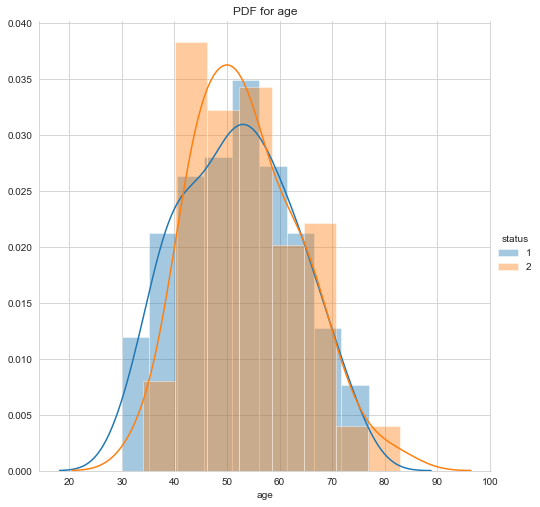

In [15]:
sns.FacetGrid(haberman, hue="status", height=7) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title("PDF for age")
plt.show()

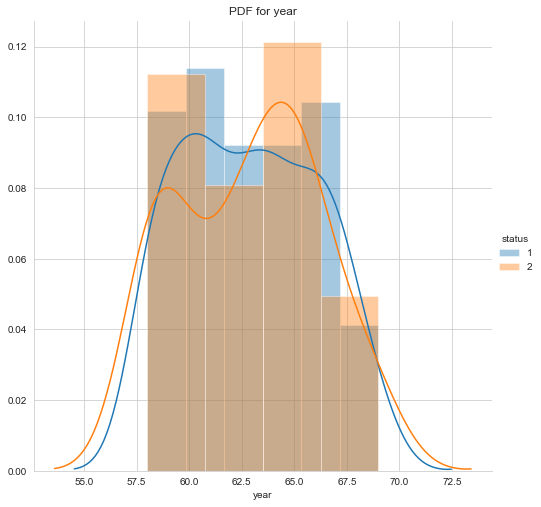

In [16]:
sns.FacetGrid(haberman, hue="status", height=7) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title("PDF for year")
plt.show()

Observations: 
1. In the 'age' plot , it is observed that at the age range from 30–75 the status of survival and death is same. So, using this datapoint we cannot predict anything.
2. Similarly, in 'year' plot, we cannot predict anything with these histograms as there is equal number of density in each data point. Even the PDF of both classification overlap on each other.
3. It can be observed that people survive long if they have less axillary nodes detected and vice versa but still it is hard to classify but this is the best data you can choose among all. So, I accept the PDF of Axillary nodes and can conclude below result

if(AxillaryNodes≤0)

Patient= Long survival

else if(AxillaryNodes≥0 && Axillary nodes≤3.5(approx))

Patient= Long survival chances are high

else if(Axillary nodes ≥3.5)

Patient = Short survival

So from above PDF we can say the patients survival status, but we cannot exactly say what percentage of patient will actually short survive or long survive.

# CDF

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


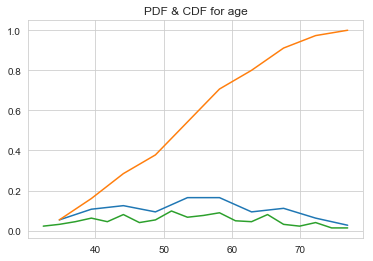

In [20]:
counts, bin_edges = np.histogram(haberman_1['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(haberman_1['age'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.title("PDF & CDF for age")
plt.show();

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


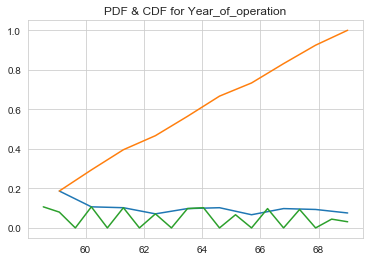

In [21]:
counts, bin_edges = np.histogram(haberman_1['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(haberman_1['year'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.title("PDF & CDF for Year_of_operation")
plt.show();

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


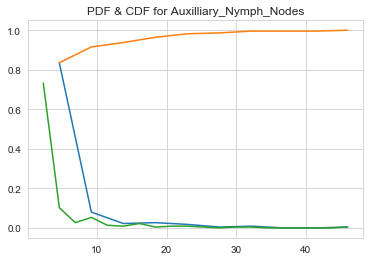

In [22]:
counts, bin_edges = np.histogram(haberman_1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(haberman_1['nodes'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.title("PDF & CDF for Auxilliary_Nymph_Nodes")
plt.show();

Observations:

1. 15% of the person's have less than or equal to age 37 who survived.
2. Persons who has more than 46 auxillary lymph node not survived.

# Mean and Standard Deviation

In [72]:
print("Means:")
print(np.mean(haberman_1["age"]))
print(np.mean(haberman_2["age"]))

print("\nStd-dev:");
print(np.std(haberman_1["age"]))
print(np.std(haberman_2["age"]))

Means:
52.01777777777778
53.67901234567901

Std-dev:
10.98765547510051
10.10418219303131


Observations:
1. The mean age of women who survived less than 5 years is more than the mean age of women who survived more than 5 years.

# MEDIAN,PERCENTILE,QUANTILE,IQR,MAD

In [73]:
print("\nMedians:")
print(np.median(haberman_1["age"]))
print(np.median(haberman_2["age"]))


print("\nQuantiles:")
print(np.percentile(haberman_1["age"],np.arange(0, 100, 25)))
print(np.percentile(haberman_2["age"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(haberman_1["age"],90))
print(np.percentile(haberman_2["age"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haberman_1["age"]))
print(robust.mad(haberman_2["age"]))



Medians:
52.0
53.0

Quantiles:
[30. 43. 52. 60.]
[34. 46. 53. 61.]

90th Percentiles:
67.0
67.0

Median Absolute Deviation
13.343419966550417
11.860817748044816


Observations:
1. There is not much the difference between the median age of the patient who survived more than 5 and who died within 5 years.
2. 50% of the women who survived more than 5 years were of 52 years age.
3. 25% of women were more than 43 years of age and 75% were less than 60 years of age among the patients who survived more than    5 years.
4. 50% of the women who survived less than 5 years were of 53 years age.
5. 90th percentile is common for both.
6. Median Absolute Deviation is slightly different.

# BOX PLOTS

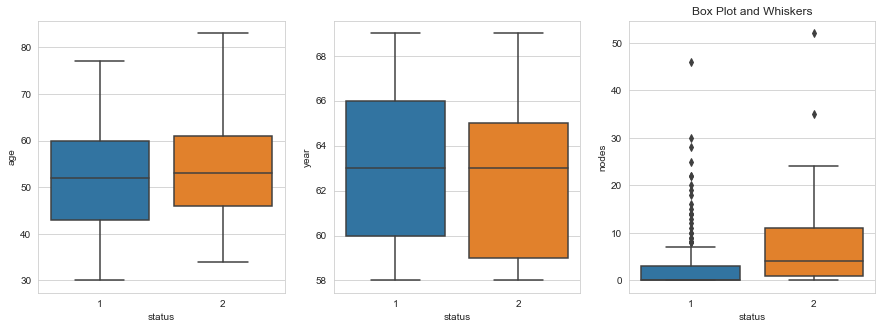

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(haberman.columns)[:-1]):
    sns.boxplot( x='status', y=feature, data=haberman, ax=axes[idx])
plt.title("Box Plot and Whiskers")
plt.show()

# VIOLIN PLOTS

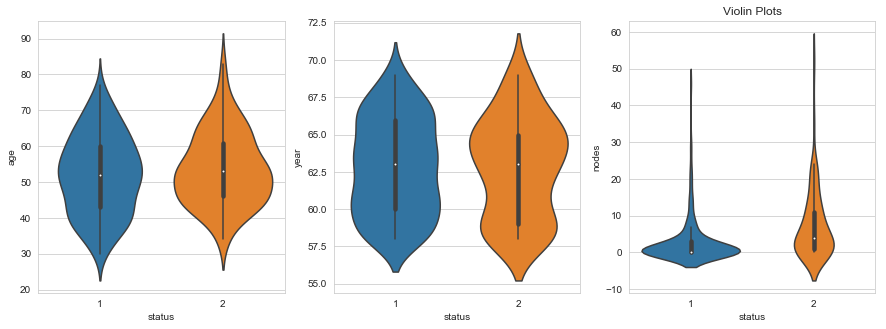

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(haberman.columns)[:-1]):
    sns.violinplot( x='status', y=feature, data=haberman, ax=axes[idx])
plt.title("Violin Plots")
plt.show()

Observations:
1. The number of positive lymph nodes of the survivors is highly densed from 0 to 5.
2. Almost 80% of the patients have less than or equal to 5 positive lymph nodea.
3. The patients treated after 1966 have the slighlty higher chance to surive that the rest. The patients treated before 1959      have the slighlty lower chance to surive that the rest.

# MULTIVARIATE PROBABILITY DENSITY, CONTOUR PLOT

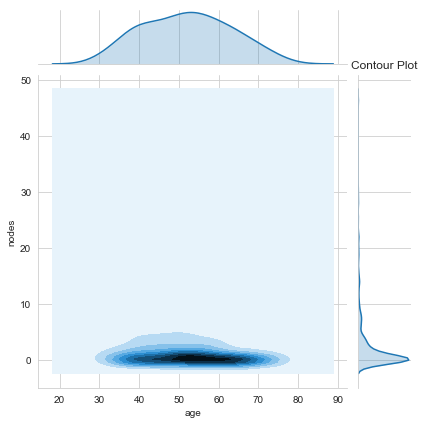

In [19]:
#2D Density plot, contors-plot
sns.jointplot(x="age", y="nodes", data=haberman_1, kind="kde");
plt.title("Contour Plot")
plt.show();

Observation:

Above is the 2D density plot for long survival using feature age and axillary nodes, it is observed the density of point for long survival is more from age range 47–60 and axillary nodes from 0–3. The dark area have major density which is hill top in 3D and density is getting low as graph get lighter. Each shade represent 1 contour plot.

# Conclusion

1. The given dataset is imbalenced as it does not contains euqal number of data-points for each class.
2. The given dataset is not linearly seprable form each class. There are too much overlapping in the data-points and hence it      is very diffucult to classify.
3. Somehow axillary lymph node is giving some intution in the dataset.
4. we can not build simple model using only if else condition we need to have some more complex technique to handle this          dataset.
5. we can say the patients survival status, but we cannot exactly say what percentage of patient will actually short survive or     long survive.